In [1]:
%pylab inline
import pandas as pd
import seaborn as sns


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load data
df = pd.read_csv('log_150k.csv',sep=',',quotechar='/', index_col='id')
df['article_url'] = df['article_url'].apply(lambda _: _[len('/wiki/'):])
df.info();

FileNotFoundError: File b'log_150k.csv' does not exist

## Чистка

Число уникальных(недублирующихся) статей в выборке.

In [174]:
df['article_url'].value_counts()[:5]

Великий_миг_(Шиллер/Михайлов)                                                          145
Милость_муз_(Вместе_с_филистром_умрёт_его_слава;_—_небесная_муза_—_Шиллер/Михайлов)    137
Учёный_работник_(Ты_дерево_взрастил,_но_не_вкусил_плода_—_Шиллер/Михайлов)             136
Могила_Анакреона_(Гёте/Михайлов)                                                       136
Данаиды_(Веки_черпаем_ситом,_и_камень_у_сердца_мы_греем_—_Шиллер/Михайлов)/ДО          136
Name: article_url, dtype: int64

In [175]:
df['article_url'].value_counts().index.shape 
#df['name'].value_counts().index.shape # не совпадает, потому что само имя может дублироваться, а url нет

(14733,)

## Анализ

Получаем все возможные категории( с повторением)

In [176]:
df['cats'] = df['categories'].str.split('##')
total_categories = []
df['cats'].apply(lambda _: total_categories.extend(_ if _ is not nan else []));
categories = pd.Series(total_categories)

Наиболее популярные категории  и авторы

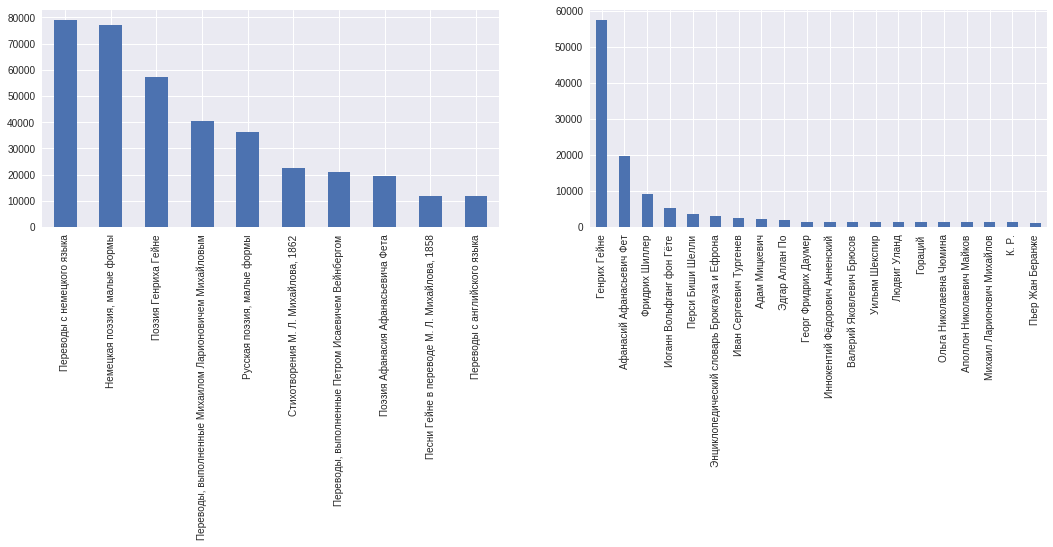

In [177]:
plt.subplots(1,2,figsize=(18,4))
plt.subplot(1,2,1)
categories.value_counts()[:10].plot.bar();

plt.subplot(1,2,2)
df['author'].value_counts()[:20].plot.bar();

In [178]:
(categories.apply(lambda _: 'Литература' in _)).sum()

123581

Выводы:

- много дублирующихся статей( судя по названию). Это означает, что из различных категорий можно придти к одним и тем же статьям. Надо как-то мониторить уже добавленные статьи(тупо вести словарь и проверять, что очередной статьи пока там нет), чтобы не  добавлять дубликаты. ✔
- встречаются статьи, на странице которых не указано ни одной категории, хотя таких статей и  очень мало(500 на 150к).
- путь до статьи, состоящий из категорий, не всегда совпадает с категориями, представленными на странице самой статьи. Похоже придётся ручками протаскивать этот путь через таски grab'а для каждой статьи.
- много статей из левых категорий. Стоит выбрать более конкретную категорию(например [Русская литература](https://ru.wikisource.org/wiki/Категория:Русская_литература)) и начинать сразу с неё. ✔
- извлекать в лог больше инфы, чтобы проделать более качественный анализ.
- нужно парсить содержимое  страничкек типо `https://ru.wikisource.org/wiki/Народные_русские_сказки_(Афанасьев)` и `https://ru.wikisource.org/wiki/Кто_может_дать_надежду_на_спасенье` на предмет списков со ссылками. Возможно вообще стоит парсить все ссылки внутри содержимого, и уже потом разбираться куда мы попали, а то так теряется часть статей.
- backup'ы всей вики https://dumps.wikimedia.org/ruwiki/20171120/
- доступ к api c python 
    - https://www.mediawiki.org/wiki/Manual:Pywikibot/Create_your_own_script
    - https://doc.wikimedia.org/pywikibot/api_ref/pywikibot.html#module-pywikibot.pagegenerators
    - https://en.wikipedia.org/wiki/Wikipedia:Creating_a_bot#Python

**Update**:

есть инфа, что можно сразу   забирать статьи [отсюда](https://ru.wikisource.org/wiki/Служебная:Все_страницы)

- нужно фильтровать статьи из "Энциклопедический словарь Брокгауза и Ефрона", ибо толку от них ноль, но при этом их очень много.